In [32]:
!pip install vaderSentiment
import tweepy
import collections
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import math
import json
from operator import itemgetter
from nltk.corpus import stopwords
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praneeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
mykey = "G8rSR6zrLrHXCpVv6hxjiXMOc"
mykeysecret = "875yFXxuTkqNOaDXGshA1Kgt63Cay15hVSbEz9Ih9cnAOOEDye"
API = "2216051994-WLE3EqCNgqAKkRCTIAqNWfzyrrwQeWxKo5gOnVM"
APIsecret = "Rx4KWvpIP9MEbhKVrG999xKzPneFVOOsC38oRWBa4YNFg"

auth = tweepy.OAuthHandler(mykey, mykeysecret)

auth.set_access_token(API, APIsecret)

api = tweepy.API(auth)

name1 = "SadhguruJV"
name2 = "VizWizBI"

tweetCount = 200




In [34]:
results1 = api.user_timeline(id=name1, count=tweetCount)
results2 = api.user_timeline(id=name2, count=tweetCount)

with open("Sadhguru_tweets", 'w') as outfile:
    for tweet1 in results1:
        json.dump(tweet1._json, outfile, sort_keys=True)
        outfile.write('\n')

with open("Andy_tweets", 'w') as outfile:
    for tweet2 in results2:
        json.dump(tweet2._json, outfile, sort_keys=True)
        outfile.write('\n')


In [35]:
csv_tweets = []
for line in open("Sadhguru_tweets", 'r'):
    csv_tweets.append(json.loads(line))

count = 1
for t in csv_tweets:
    count += 1
    Created_At=(t['created_at'])
    Entities=(t['entities'])
    Id=(t['id'])
    Language=(t['lang'])
    Place=(t['place'])
    Source=(t['source'])
    Text=(t['text'])
    Username=(t['user']['name'])

    Sadhguru_Dataframe =[[t['created_at'],t['entities'],t['id'],t['lang'],t['place'],t['source'],t['text'],t['user']['name']]for t in csv_tweets]
Sadhguru_tweet_table = pd.DataFrame(Sadhguru_Dataframe, columns=['Created_At' ,'Entities','Id','Language','Place','Source','Text','Username'])
Sadhguru_tweet_table

,Created_At,Entities,Id,Language,Place,Source,Text,Username
0,Fri Oct 25 02:45:04 +0000 2019,"{'hashtags': [{'indices': [70, 85], 'text': 'S...",1187560681429749761,en,None,"<a href=""https://www.hootsuite.com"" rel=""nofol...",Life is involvement. Where there is no involve...,Sadhguru
1,Thu Oct 24 15:04:23 +0000 2019,"{'hashtags': [{'indices': [21, 36], 'text': 'C...",1187384347109683200,en,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",We want to establish #CauveryCalling as a demo...,Sadhguru
2,Thu Oct 24 11:56:26 +0000 2019,"{'hashtags': [{'indices': [0, 15], 'text': 'Ca...",1187337046408302592,en,None,"<a href=""http://twitter.com/download/android"" ...",#CauveryCalling is an economic plan for the fa...,Sadhguru
3,Thu Oct 24 09:50:37 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1187305384299491329,en,None,"<a href=""http://twitter.com/download/android"" ...","A pleasure to fly with Captain @AnnyDivya, the...",Sadhguru
4,Thu Oct 24 02:45:05 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1187198297276059648,en,None,"<a href=""https://www.hootsuite.com"" rel=""nofol...","In search of wellbeing, we have done all kinds...",Sadhguru
...,...,...,...,...,...,...,...,...
195,Wed Sep 25 02:45:04 +0000 2019,"{'hashtags': [{'indices': [96, 111], 'text': '...",1176689043687559173,en,None,"<a href=""https://www.hootsuite.com"" rel=""nofol...",It is not the amount of action but the depth o...,Sadhguru
196,Tue Sep 24 16:03:48 +0000 2019,"{'hashtags': [{'indices': [75, 90], 'text': 'C...",1176527662761693184,en,None,"<a href=""http://twitter.com/download/android"" ...",Appreciate the support of Cauvery Mitr @nvagra...,Sadhguru
197,Tue Sep 24 15:16:53 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1176515856802578433,en,None,"<a href=""http://twitter.com/download/android"" ...",A land with rich soil &amp; abundant water is ...,Sadhguru
198,Tue Sep 24 14:39:05 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1176506343122857985,en,None,"<a href=""http://twitter.com/download/android"" ...",The significance of Kashi is that the highest ...,Sadhguru


In [36]:
csv_tweets1 = []
for line in open("Andy_tweets", 'r'):
    csv_tweets1.append(json.loads(line))

for t in csv_tweets:
    Created_At=(t['created_at'])
    Entities=(t['entities'])
    Id=(t['id'])
    Language=(t['lang'])
    Place=(t['place'])
    Source=(t['source'])
    Text=(t['text'])
    Username=(t['user']['name'])

    Andy_Dataframe =[[t['created_at'],t['entities'],t['id'],t['lang'],t['place'],t['source'],t['text'],t['user']['name']]
                     for t in csv_tweets1]
Andy_tweet_table = pd.DataFrame(Andy_Dataframe, columns=['Created_At' ,'Entities','Id','Language','Place','Source','Text','Username'])
Andy_tweet_table

,Created_At,Entities,Id,Language,Place,Source,Text,Username
0,Fri Oct 25 09:17:15 +0000 2019,"{'hashtags': [{'indices': [74, 82], 'text': 'T...",1187659374652743680,en,None,"<a href=""https://about.twitter.com/products/tw...",RT @DiegoTParker: Took me a while but finally ...,Andy Kriebel
1,Fri Oct 25 09:16:54 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1187659286039715840,en,None,"<a href=""https://about.twitter.com/products/tw...",@LosaniMeera @TriMyData @tableaupublic You've ...,Andy Kriebel
2,Fri Oct 25 09:12:04 +0000 2019,"{'hashtags': [{'indices': [77, 92], 'text': 'M...",1187658071943897089,en,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1400+ vizzes from almost 6000 participants! Th...,Andy Kriebel
3,Fri Oct 25 07:58:28 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1187639549683482625,en,None,"<a href=""https://about.twitter.com/products/tw...",@JackHineman Nice work on the switcher to let ...,Andy Kriebel
4,Fri Oct 25 07:55:56 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1187638910622535681,en,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@Marc_Soares @googleanalytics @TriMyData I can...,Andy Kriebel
...,...,...,...,...,...,...,...,...
195,Sun Sep 22 15:38:29 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",1175796517522874368,en,None,"<a href=""http://twitter.com/download/iphone"" r...",@sarahlovesdata @DataSF @TriMyData Looks like ...,Andy Kriebel
196,Sun Sep 22 10:35:12 +0000 2019,"{'hashtags': [{'indices': [4, 19], 'text': 'Ma...",1175720190987964416,en,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...","For #MakeoverMonday week 39, your challenge is...",Andy Kriebel
197,Sat Sep 21 06:23:50 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1175294548752420865,en,None,"<a href=""http://twitter.com/download/iphone"" r...",@TomJSeiple @DataRevelations @_tombrown_ @Lear...,Andy Kriebel
198,Sat Sep 21 06:22:55 +0000 2019,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1175294317755346945,en,None,"<a href=""http://twitter.com/download/iphone"" r...",@AnnUJackson @curtisharris_ @lukestanke @lorna...,Andy Kriebel


In [38]:
Joint = pd.concat([Sadhguru_tweet_table, Andy_tweet_table])
Joint.to_csv('Joint_Data.csv', index=False)


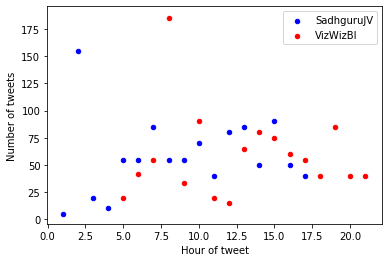

In [40]:
results1 = api.user_timeline(id=name1, count=tweetCount)
results2 = api.user_timeline(id=name2, count=tweetCount)



for tweet in results1:
    time_of_tweet1.append(tweet.created_at.hour)

for tweet in results2:
    time_of_tweet2.append(tweet.created_at.hour)

time1 = collections.Counter(time_of_tweet1)
time2 = collections.Counter(time_of_tweet2)

df1 = pd.DataFrame({'Hour of tweet': list(time1.keys()), 'Number of tweets': list(time1.values()) })
df2 = pd.DataFrame({'Hour of tweet': list(time2.keys()), 'Number of tweets': list(time2.values()) })
ax = plt.gca()

df1.plot(kind='scatter',x='Hour of tweet', y='Number of tweets',color='Blue', ax=ax)
df2.plot(kind='scatter',x='Hour of tweet', y='Number of tweets',color='red', ax=ax)

plt.legend([name1, name2])
plt.show()

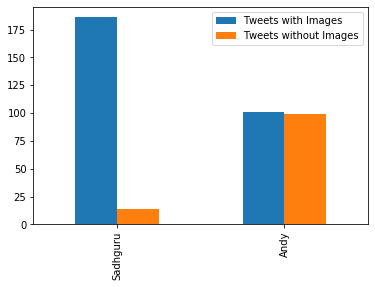

In [41]:
Images_sadhguru = 0
Images_andy = 0

results1 = api.user_timeline(id=name1, count=tweetCount)
for i in results1:
    if (len(i.entities['urls'])) == 1:
        Images_sadhguru = Images_sadhguru+1

results2 = api.user_timeline(id=name2, count=tweetCount)
for i in results2:
    if (len(i.entities['urls'])) == 1:
        Images_andy = Images_andy+1

df = pd.DataFrame({'Tweets with Images': [Images_sadhguru, Images_andy], 'Tweets without Images': [tweetCount-Images_sadhguru, tweetCount-Images_andy]},
                  index=["Sadhguru", "Andy"])
df.plot(kind='bar')
plt.show()

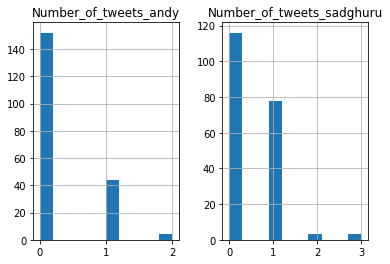

In [42]:
results1 = api.user_timeline(id=name1, count=tweetCount)
results2 = api.user_timeline(id=name2, count=tweetCount)
tweets_sadhguru = []
tweets_andy = []
for i in results1:
    tweets_sadhguru.append(len(i.entities['hashtags']))
for i in results2:
    tweets_andy.append(len(i.entities['hashtags']))
df = pd.DataFrame({'Number_of_tweets_sadghuru':tweets_sadhguru, 'Number_of_tweets_andy':tweets_andy})
df.hist()
plt.show()

In [43]:
results1 = api.user_timeline(id=name1, count=tweetCount)
results2 = api.user_timeline(id=name2, count=tweetCount)
words_sadhguru = []
words_andy = []
logs_ratio1 = {}
logs_ratio2 = {}
stop_words = set(stopwords.words('english'))
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for i in results1:
    txt = nltk.word_tokenize(i.text)
    for j in txt:
        if j not in stop_words:
            if j not in punctuations:
                words_sadhguru.append(j)

for i in results2:
    txt = nltk.word_tokenize(i.text)
    for j in txt:
        if j not in stop_words:
            if j not in punctuations:
                words_andy.append(j)
words1=collections.Counter(words_sadhguru)
del(words1['https'])
words2=collections.Counter(words_andy)
del(words2['https'])
total_words1= len(words1.keys())
total_words2= len(words2.keys())

for i in words1.keys():
    ratio1 = (words1[i]+1)/(total_words1+1)
    ratio2 = (words2[i]+1)/(total_words2+1)
    var = ratio1/ratio2
    log_odds_ratio1 = math.log2(var)
    logs_ratio1[i]=log_odds_ratio1
d = collections.OrderedDict(sorted(logs_ratio1.items(), key=itemgetter(1)))
a = list(d.keys())
top1 = a[len(a)-20:len(a)]
print ("Top 20 words with respect to log ratio of Sadhguru are:")
print (top1)


for i in words2.keys():
    ratio1 = (words2[i]+1)/(total_words2+1)
    ratio2 = (words1[i]+1)/(total_words1+1)
    var = ratio1/ratio2
    log_odds_ratio2 = math.log2(var)
    logs_ratio2[i]=log_odds_ratio2
b = collections.OrderedDict(sorted(logs_ratio2.items(), key=itemgetter(1)))
c = list(b.keys())
top2 = c[len(c)-20:len(c)]
print ("Top 20 words with respect to log ratio of Andy are:")
print (top2)


Top 20 words with respect to log ratio of Sadhguru are:
['heart', 'Mother', 'rich', 'future', 'Shoora', 'farmers', 'amp', 'land', 'best', 'problems', 'soil', 'Dear', 'water', 'Blessings', '-Sg', 'contribution', 'Cauvery', 'Appreciate', 'support', 'CauveryCalling']
Top 20 words with respect to log ratio of Andy are:
['WorkoutWednesday2019', '•', 'Week', 'VizSaiyan', 'Tableau', 'lorna_eden', 'chart', 'I', "n't", 'dataschooluk', 'sophie_sparkes', 'infolabUK', 'sarahlovesdata', 'week', 'tableau', 'DataSF', 'LunarModule7', 'MakeoverMonday', 'tableaupublic', 'TriMyData']


In [44]:
results1 = api.user_timeline(id=name1, count=tweetCount)
results2 = api.user_timeline(id=name2, count=tweetCount)
sent_sadhguru = []
sent_andy = []
compound_tweet1=[]
compound_tweet2=[]
for i in results1:
    sent_sadhguru.extend(nltk.sent_tokenize(i.text))
for j in results2:
    sent_andy.extend(nltk.sent_tokenize(j.text))
    
sid_obj = SentimentIntensityAnalyzer()
for sent in sent_sadhguru:
    sentiment_dict = sid_obj.polarity_scores(sent)
    compound_tweet1.append(sentiment_dict['compound'])
print ("Average Compound vaue for Sadhguru is "+str((sum(compound_tweet1)/len(compound_tweet1))))

for sent in sent_andy:
    sentiment_dict = sid_obj.polarity_scores(sent)
    compound_tweet2.append(sentiment_dict['compound'])
print ("Average Compound vaue for Andy is "+str((sum(compound_tweet2)/len(compound_tweet2))))
    

Average Compound vaue for Sadhguru is 0.23965611111111093
Average Compound vaue for Andy is 0.15012682926829254
